In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")

In [2]:
data = pd.read_csv("TitanicPreprocessed.csv")

### Check age column
    - Check unique age values to discard weird ones
    - Impute values to ages that don't exist
    - Cast age column to int

In [3]:
np.sort(data["Age"].unique())
data["Age"] = np.where(data["Age"] < 1, 1, data["Age"])
data["Age"] = data["Age"].astype(int)
#data.loc[data["Age"] == 1].drop(cols_ticket + cols_embarked + cols_cabin, axis = 1)

### Split columns

In [4]:
cols = data.columns.values.tolist()
cols_ticket = [var for var in cols if "Ticket" in var]
cols_family = [var for var in cols if "Family" in var if var not in "FamilySize"]
cols_class = [var for var in cols if "Pclass" in var]
cols_embarked = [var for var in cols if "Embarked" in var]
cols_titles = [var for var in cols if "Title" in var]
cols_cabin = [var for var in cols if "Cabin" in var]

## Plot features vs Target

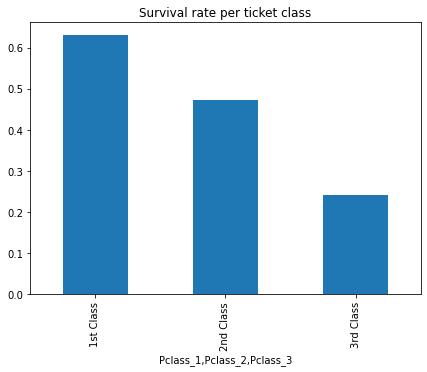

In [5]:
data.groupby(cols_class)["Survived"].mean().sort_values(ascending = False).plot.bar(figsize = (7,5))
plt.title("Survival rate per ticket class")
plt.xticks(ticks = [0,1,2], labels = ["1st Class", "2nd Class", "3rd Class"])
plt.show()

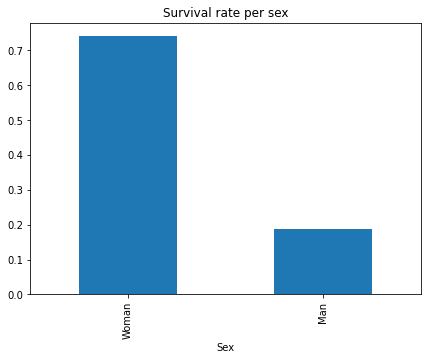

In [6]:
data.groupby(["Sex"])["Survived"].mean().sort_values(ascending = False).plot.bar(figsize = (7,5))
plt.title("Survival rate per sex")
plt.xticks(ticks = [0,1], labels = ["Woman", "Man"])
plt.show()

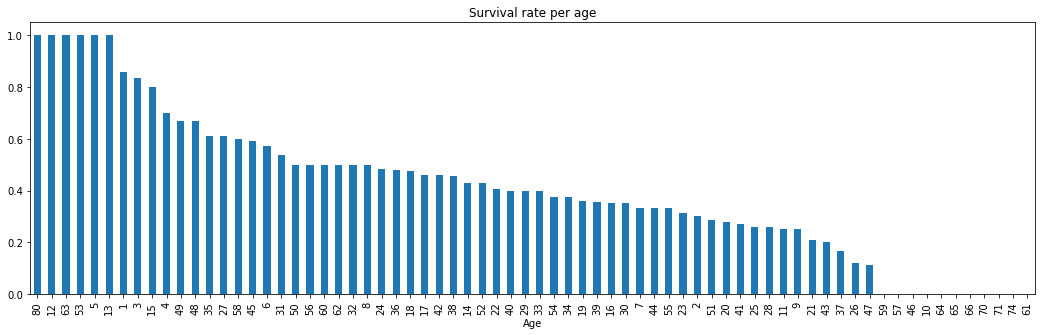

In [7]:
data.groupby(["Age"])["Survived"].mean().sort_values(ascending = False).plot.bar(figsize = (18,5))
plt.title("Survival rate per age")
#plt.xticks(ticks = [0,1], labels = ["Woman", "Man"])
plt.show()

To get a better performance, we can group values of variables into bins, for example Age and Sex

In [8]:
data['AgeCat'] = ''
data['AgeCat'].loc[(data['Age'] < 18)] = 'young'
data['AgeCat'].loc[(data['Age'] >= 18) & (data['Age'] < 56)] = 'mature'
data['AgeCat'].loc[(data['Age'] >= 56)] = 'senior'

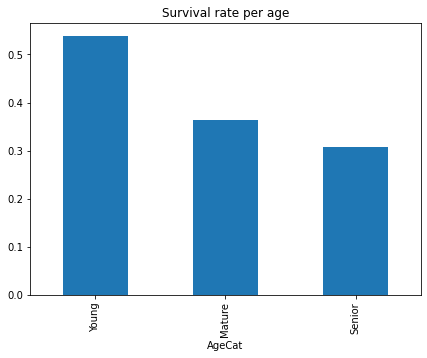

In [9]:
data.groupby(["AgeCat"])["Survived"].mean().sort_values(ascending = False).plot.bar(figsize = (7,5))
plt.title("Survival rate per age")
plt.xticks(ticks = [0,1,2], labels = ["Young", "Mature", "Senior"])
plt.show()

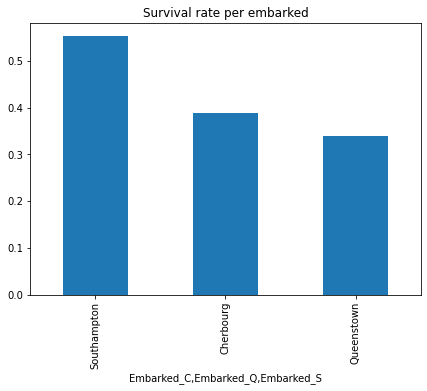

In [10]:
data.groupby(cols_embarked)["Survived"].mean().sort_values(ascending = False).plot.bar(figsize = (7,5))
plt.title("Survival rate per embarked")
plt.xticks(ticks = [0,1,2], labels = ["Southampton", "Cherbourg", "Queenstown"])
plt.show()

Most of passengers boarded form Southampton

In [11]:
data["AgeGender"] = ""
data['AgeGender'] = np.where(((data['Sex'] == 1) & (data['Age'] <= 21)), 'Young_Man', data['AgeGender'])
data['AgeGender'] = np.where(((data['Sex'] == 0) & (data['Age'] <= 21)), 'Young_Woman', data['AgeGender'])
data['AgeGender'] = np.where(((data['Sex'] == 1) & ((data["Age"] < 22) & (data['Age'] < 50))), 'Mature_Man', data['AgeGender'])
data['AgeGender'] = np.where(((data['Sex'] == 0) & ((data['Age'] > 21) & (data['Age'] < 50))), 'Mature_Woman', data['AgeGender'])
data['AgeGender'] = np.where(((data['Sex'] == 1) & (data['Age'] > 50)), 'Old_Man', data['AgeGender'])
data['AgeGender'] = np.where(((data['Sex'] == 0) & (data['Age'] > 50)), 'Old_Woman', data['AgeGender'])

In [12]:
data["AgeGender"] = np.where(data["AgeGender"] == "", "Young_Man", data["AgeGender"])

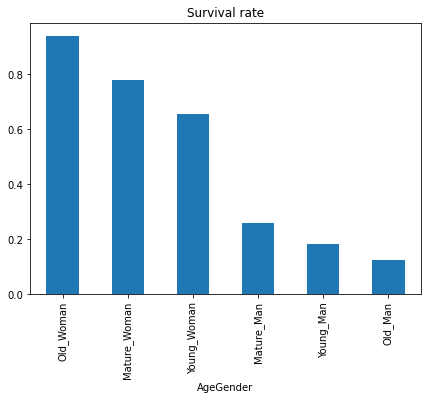

In [13]:
data.groupby("AgeGender")["Survived"].mean().sort_values(ascending = False).plot.bar(figsize = (7,5))
plt.title("Survival rate")
plt.show()

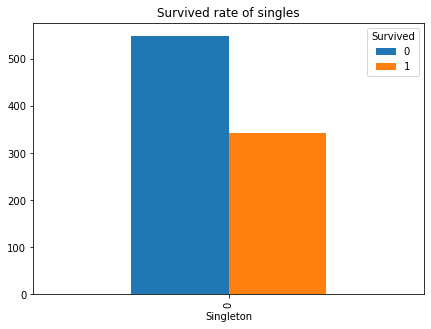

In [14]:
pd.crosstab(data.Singleton, data.Survived).plot.bar(figsize = (7,5))
plt.title("Survived rate of singles")
plt.show()

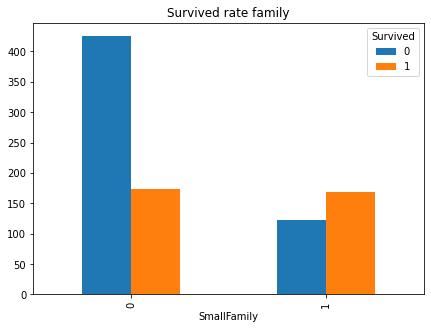

In [15]:
pd.crosstab(data.SmallFamily, data.Survived).plot.bar(figsize = (7,5))
plt.title("Survived rate family")
plt.show()

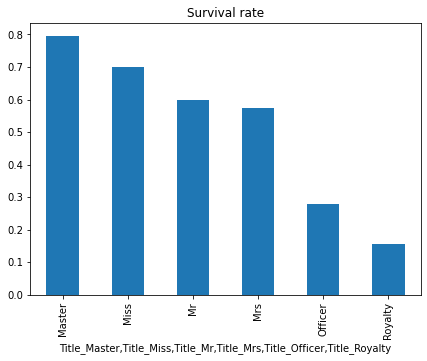

In [16]:
data.groupby(cols_titles)["Survived"].mean().sort_values(ascending = False).plot.bar(figsize = (7,5))
plt.title("Survival rate")
plt.xticks(ticks = [0,1,2,3,4,5], labels = ["Master", "Miss", "Mr", "Mrs", "Officer", "Royalty"])
plt.show()

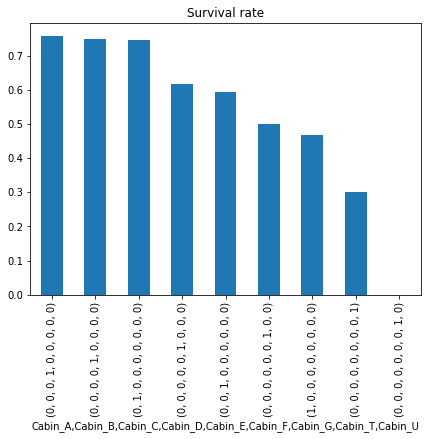

In [17]:
data.groupby(cols_cabin)["Survived"].mean().sort_values(ascending = False).plot.bar(figsize = (7,5))
plt.title("Survival rate")
#plt.xticks(ticks = [0,1,2,3,4,5], labels = ["Master", "Miss", "Mr", "Mrs", "Officer", "Royalty"])
plt.show()

### Insights

In [18]:
data["Survived"].value_counts()/len(data)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [19]:
data["Pclass_1"].sum()/len(data), data["Pclass_2"].sum()/len(data), data["Pclass_3"].sum()/len(data)

(0.24242424242424243, 0.20650953984287318, 0.5510662177328844)

In [20]:
data["Sex"].value_counts()/len(data)

1    0.647587
0    0.352413
Name: Sex, dtype: float64

In [21]:
import seaborn as sns
cols_drop = cols_ticket + cols_cabin
data = data.drop(cols_drop, axis = 1)

In [22]:
data = data.drop(["Singleton"], axis = 1)

<AxesSubplot:>

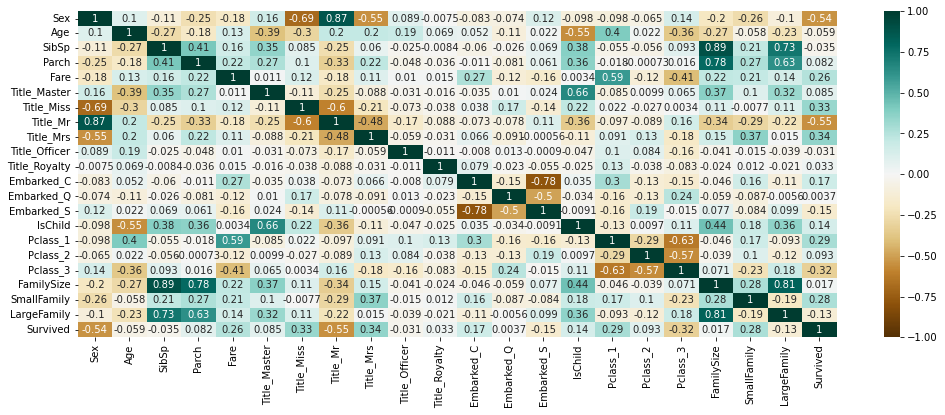

In [23]:
plt.figure(figsize=(17, 6))
sns.heatmap(data.corr(),  vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [24]:
x = data.groupby(["AgeGender"])['Survived'].mean()
prob_df = pd.DataFrame(x)
prob_df['died'] = 1 - prob_df['Survived']
prob_df['ratio'] = prob_df['Survived'] / prob_df['died']
probs = prob_df['ratio'].to_dict()
data["AgeGender"] = data['AgeGender'].map(probs)

In [25]:
data = data.drop(["Age"], axis = 1)
data = data.drop(cols_titles, axis = 1 )

In [26]:
data["Alone"] = ""
data["Alone"] = np.where(((data['SibSp'] == 0) & (data["Parch"] == 0 )), 1, 0)

<AxesSubplot:>

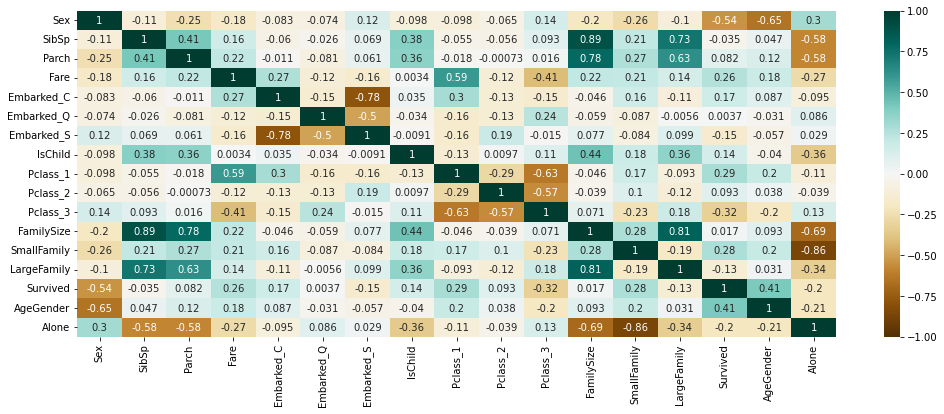

In [27]:
plt.figure(figsize=(17, 6))
sns.heatmap(data.corr(),  vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [28]:
data = data.drop(cols_embarked, axis = 1)
data = data.drop(["AgeCat", "Sex", "SibSp", "Parch", "Fare", "IsChild", "FamilySize"], axis = 1)

In [29]:
data.to_csv("Final_titanic2.csv", index = False)